<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/metodos_2_ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></center></h1>
<center><h1>Análise Numérica</h1></center>
<center><h2>2025/1</h2></center>
<center><h3>Métodos de segunda ordem</h3></center>
<center><h4>Prof. Fernando Deeke Sasse - CCT, UDESC</h4></center>

## 1. Esquema geral para métodos de segunda ordem

Por ordem do método nos referimos ao grau $n$ do erro global $O(\Delta t ^n)$ do erro cometido na execução do processo iterativo. O método de Euler é um método de primeira ordem, pois o erro local (numa iteração individual é de ordem $O(\Delta t^2)$, enquanto que o erro global é de ordem $O(\Delta t)$. Consideraremos aqui métodos de segunda ordem para problemas de de valor inicial de qualquer ordem. Usaremos a notação vetorial, pois como uma EDO de ordem $k$ pode ser expressa como um sistema de $k$ equações de primeira ordem, nossa abordagem aqui é completamente geral.

Seja uma EDO vetorial da forma $Y'(t)=F(t,Y(t))$. Consideremos uma expansão do tipo

\begin{equation}
Y(t+\Delta t)=Y(t)+\Delta t \left[A F(t,Y(t))+B F(t+P\Delta t,Y(t)+Q\Delta t F(t,Y(t)))\right]\,,\qquad (1)
\end{equation}

sendo $A$, $B$ e $P$ constantes arbitrárias. Façamos uma expansão de Taylor do último termo da equação acima:

\begin{align}
&F(t+P\Delta t, Y(t)+Q\Delta t F(t,Y(t)))=\\
&=F(t,Y(t))+P\Delta t \frac{\partial F(t,Y(t))}{\partial t}+Q\Delta t
\frac{\partial F(t,Y(t))}{\partial Y}\frac{dY}{dt}+O(\Delta t^2)\\
&=F(t,Y(t))+P\Delta t \frac{\partial F(t,Y(t))}{\partial t}+Q\Delta t
\frac{\partial F(t,Y(t))}{\partial Y}F(t,Y(t))+O(\Delta t^2)\,\qquad (2)
\end{align}

Substituindo esta equação na expansão inicial temos

\begin{align}
Y(t+\Delta t)&=Y(t)+\Delta t (A+B)F(t,Y(t))+BP\Delta t^2\frac{\partial F(t,Y(t))}{\partial t}+\\
&+BQ \frac{\partial F(t,Y(t))}{\partial Y}F(t,Y(t))\Delta t^2+O(\Delta t^3)\,.\qquad (3)
\end{align}

Expandindo $Y(t+\Delta t)$ em uma série de Taylor obtemos

$$
Y(t+\Delta t)= Y(t) +\Delta t F(t,Y(t))+\frac{\Delta t^2}{2}\left(\frac{\partial F (t,Y(t))}{\partial t}+
\frac{\partial F (t,Y(t))}{\partial Y}F(t,Y(t)\right)+O(\Delta t^3)\,.\qquad (4)
$$

Comparando (3) e (4) obtemos

$$
A+B=1\,,\quad BP = \frac{1}{2}\,,\quad BQ=\frac{1}{2}\,. \qquad (5)
$$

Temos três equações para 4 incógnitas, de modo que há um grau de liberdade. Escolhamos o valor de $A$. Tomando $A=0$ obtemos o chamado *método de Euler modificado* ou *método de Runge-Kutta de segunda ordem*. Temos então

$$
A=0\,,\quad B=1\,,\quad P=\frac{1}{2}\,,\quad Q=\frac{1}{2}\,.\qquad (6)
$$

Portanto, o método iterativo correspondente é dado por
$$
Y(t+\Delta t):=Y(t)+\Delta t F\left(t+\frac{\Delta t}{2},Y(t)+\frac{\Delta t}{2}F(t,Y(t)) \right)\,,\qquad (7)
$$

Outra escolha popular é $A=1/2$, correspondente ao *método de Heun*, ou *método de Euler melhorado*. Neste caso,

$$
A= B=\frac{1}{2}\,,\quad P= Q=1\,.\qquad (8)
$$

resultando no seguinte processo iterativo:

$$
Y(t+\Delta t):=Y(t)+\frac{\Delta t}{2} \left[F(t,Y(t))+F\left(t+\Delta t, Y(t) + \Delta t F(t,Y(t)) \right)\right]\,.\qquad (9)
$$

Escolhendo

$$
A = \frac{1}{4}\,,\quad B=\frac{3}{4}, \quad P=Q=\frac{2}{3}\,.
$$

obtemos o chamado *método dos dois terços*. O processo iterativo é dado por

$$
Y(t+\Delta t):=Y(t)+\Delta t \left(\frac{1}{4}u_1+\frac{3}{4}u_2\right)\,,\qquad (10)
$$

$$
u_1=F(t,Y(t))\,,\quad u2 = F\left(t+\frac{2}{3}\Delta t ,Y(t)+\frac{2}{3}u_1 \Delta t\right)\,.\qquad (11)
$$

É possível mostrar que neste caso o limite superior para o erro é mínimo [1].

É importante notar que a nomenclatura sobre o nome dos métodos não é única na literatura. Esta que seguimos aqui é aquela utilizada por Holmes [2]. A seguir consideraremos alguns desses métodos em detalhe.

## 2. Método de Euler Modificado para EDOs de Primeira Ordem

Dado um PVI do tipo

$$
y'= f(t,y(t))\,\qquad y(t_0)=y_0\,,\qquad (12)
$$

fazendo $h=\Delta t$, o método de Euler modificado, de acordo com (7), é dado pelo seguinte processo iterativo:

$$
y(t+h)=y(t)+hf\left(t+\frac{h}{2},y(t)+\frac{h}{2}f(t,y(t)) \right)\,,\qquad (13)
$$


Implementemos este processo.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Basta uma simples modificação no método de Euler simples:

In [ ]:
def odeEulerModificado(f, t, y0):
    N = len(t)
    y = np.empty(N)
    y[0] = y0
    h = t[1] - t[0]

    for n in range(N - 1):
        tn = t[n]
        yn = y[n]
        k1 = f(tn, yn)
        k2 = f(tn + h/2, yn + h/2 * k1)
        y[n + 1] = yn + h * k2

    return y

### Exemplo 1.1
Verifiquemos o desempenho do método de Euler modificado resolvendo um caso para o qual conhecemos a solução exata. Consideremos o problema de valor inicial

$$
y' +y-ty^3=0\,,\qquad y(0)=1\,
$$

e determinemos a solução no intervalo $[0.2]$ com subintervalos $h=0.05$.
Esta é uma equação de Bernoulli, e a solução para o PVI é dada por

$$
y = \frac{2}{\sqrt{2+4t+2 \mbox{e}^{2t}}}\,.
$$

Escrevendo a EDO na forma $y'=f(t,y(t))$, temos

In [ ]:
f = lambda x,y: -y+x*y**3

Definimos a malha e o valor inicial:

In [ ]:
t = np.linspace(0,2,41)
y0 = 1

Aplicamos o algoritmo do método de Euler modificado:

In [ ]:
y_eulerM = odeEulerM(f,t,y0)

Comparemos o resultado obtido com a solução exata:

In [ ]:
yexata = lambda t: 2/(2+4*t+2*np.exp(2*t))**(1/2)

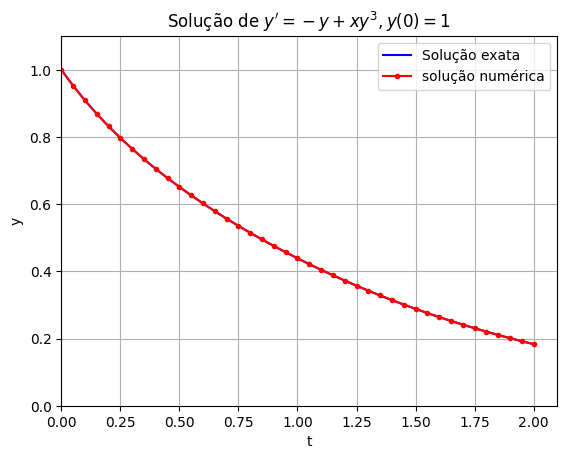

In [ ]:
plt.plot(t,yexata(t),'b-')
plt.plot(t,y_eulerM,'r.-')
plt.axis([0,2.1,0.,1.1])
plt.grid(True)
plt.title("Solução de $y'=-y+xy^3, y(0)=1$");
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["Solução exata", "solução numérica"])

A diferença entre as soluções numérica e exata não é visível. Examinemos  o erro:

Text(0, 0.5, 'erro')

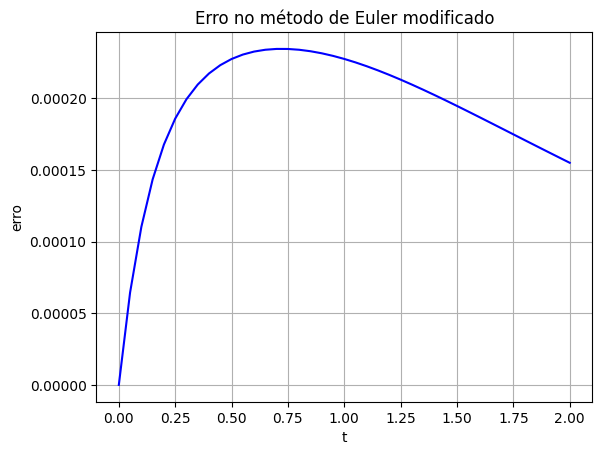

In [ ]:
plt.plot(t,abs(yexata(t)-y_eulerM),'b-')
plt.grid(True)
plt.title("Erro no método de Euler modificado");
plt.xlabel('t')
plt.ylabel('erro')

O erro máximo agora é da ordem de $10^{-4}$, contrastando com o erro de $10^{-2}$ obtido para este mesmo problema, usando o método de Euler simples.

## 3. Método dos dois terços para EDOs de primeira ordem

Dado um PVI do tipo

$$
y'= f(t,y(t))\,\qquad y(t_0)=y_0\,,\qquad (14)
$$

fazendo $h=\Delta t$, o método dos dois terços, de acordo com (11), é dado pelo seguinte processo iterativo:

$$
y(t+\Delta t):=y(t)+h \left(\frac{1}{4}w_1+\frac{3}{4}w_2\right)\,,\qquad (15)
$$

$$
w_1=f(t,y(t))\,,\quad w2 = f\left(t+\frac{2}{3}h ,y(t)+\frac{2}{3}w_1 h\right)\,.\qquad (16)
$$

Implementaremos este método em Python:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def odeDoisTercos(f, t, y0):
    N = len(t)
    y = np.empty(N)
    y[0] = y0
    h = t[1] - t[0]

    for n in range(N - 1):
        tn = t[n]
        yn = y[n]
        k1 = f(tn, yn)
        k2 = f(tn + (2/3)*h, yn + (2/3)*h * k1)
        y[n + 1] = yn + (h/4) * k1 + (3*h/4) * k2

    return y

### Exemplo 3.1
Resolveremos novamente o problema exposto no Exemplo 2.1: Verifiquemos o desempenho do método dos dois terços resolvendo um caso para o qual conhecemos a solução exata. Ao final faremos uma comparação entre os erros cometidos neste método e aqueles do método de Euler modificado. Consideremos o problema de valor inicial

$$
y' +y-ty^3=0\,,\qquad y(0)=1\,
$$

e determinemos a solução no intervalo $[0.2]$ com subintervalos $h=0.05$.
Esta é uma equação de Bernoulli, e a solução para o PVI é dada por

$$
y = \frac{2}{\sqrt{2+4t+2 \mbox{e}^{2t}}}
$$

Definimos o lado direito da EDO:

In [ ]:
f = lambda x,y: -y+x*y**3

Definimos a malha com subintervalos $h=0.05$ e a condição inicial:

In [ ]:
t = np.linspace(0,2,41)
y0 = 1

Usamos a função para determinar os valores de $y(t)$:

In [ ]:
y_DT = odeDoisTercos(f,t,y0)

Definimos a expressão para a solução exata:

In [ ]:
yexata = lambda t: 2/(2+4*t+2*np.exp(2*t))**(1/2)

Façamos o gráfico da solução, juntamente com a solução exata:

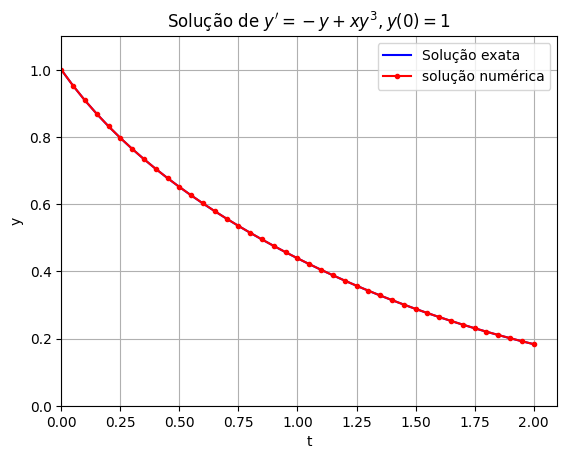

In [ ]:
plt.plot(t,yexata(t),'b-')
plt.plot(t,y_DT ,'r.-')
plt.axis([0,2.1,0.,1.1])
plt.grid(True)
plt.title("Solução de $y'=-y+xy^3, y(0)=1$");
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["Solução exata", "solução numérica"])

A diferença entre a aproximação e a solução exata não é visível diretamente. Calculemos o erro em cada ponto, já comparando com o erro obtido com o uso do método de Euler modificado:

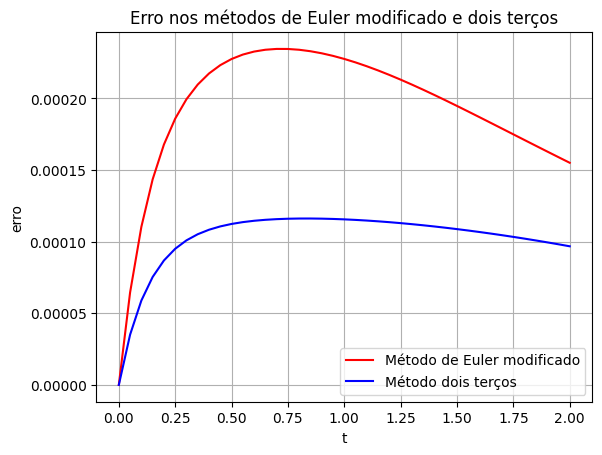

In [ ]:
plt.plot(t,abs(yexata(t)-y_eulerM),'r-')
plt.plot(t,abs(yexata(t)-y_DT),'b-')
plt.grid(True)
plt.title("Erro nos métodos de Euler modificado e dois terços");
plt.xlabel('t')
plt.ylabel('erro')
plt.legend(["Método de Euler modificado", "Método dois terços"])

Como esperado, o método dos dois terços tem uma acurácia melhor do que a do método de Euler modificado, embora os erros sejam de magnitudes semelhantes.

## 4. Método de Euler modificado para EDOs de segunda ordem

A generalização para do método de Euler modificado para EDOs de ordens superiores é quase trivial. No caso de segunda ordem, para uma EDO do tipo $y'' = f(t,y(t), y'(t))$ definimos  $u_1=y$ e $u_2=y'$, de modo que a EDO pode ser reescrita como

\begin{align}
& u_1'=u_2(t)\\
& u_2'=f\left[t,u_1(t),u_2(t)\right]\,.
\end{align}
Em forma matricial, com
$$
Y(t)=\begin{bmatrix}
u_1(t) \\
u_2(t)
\end{bmatrix}\,\,,F(t,Y(t))=\begin{bmatrix}
u_2(t) \\
f\left[t,u_1(t),u_2(t)\right]\,,
\end{bmatrix}
$$
temos

$$
Y'(t)=F(t,Y(t))\,.
$$
O método de Euler modificado torna-se

$$
Y(t+h)=Y(t)+hF\left(t+\frac{h}{2},Y(t)+\frac{h}{2}F(t,Y(t)) \right)\,.
$$

Em termos das componentes temos

\begin{align}
u_1(t+h)&=u_1(t)+h \left[u_2(t)+\frac{h}{2}f(t,u_1(t),u_2(t))\right] , \\
u_2(t+h)&=u_2(t) + h f\left[t+\frac{h}{2},u_1(t)+\frac{h}{2}u_2(t), u_2(t)+\frac{h}{2}f(t,u_1(t),u_2(t))
\right].
\end{align}
Apliquemos este método a um PVI.


### Exemplo 2.1
Apliquemos o método de Euler modificado a uma EDO de segunda ordem que admite solução exata para examinar a acurácia do método. O mesmo problema já foi resolvido por meio do método de Euler simples. O PVI é dado por

$$
y'' +4y'+2y=\mbox{e}^{2t}\,,\qquad y(0)=1\,, \qquad y'(0)=3\,.
$$

Queremos determinar a solução no intervalo $[0,2.5]$ com subintervalos $h=0.025$.
Esta é uma equação linear não homogênea que pode ser resolvido exatamente usando o método dos coeficientes indeterminados. A solução exata é dada por

$$
y = \mbox{e}^{(-2+\sqrt{2})t} \left(\frac{13}{28}+\frac{33\sqrt{2}}{28}\right)+
\mbox{e}^{-(2+\sqrt{2})t} \left(\frac{13}{28}-\frac{33\sqrt{2}}{28}\right)+\frac{\mbox{e}^{2t}}{14}\,.
$$

Aqui $u_1=y$, $u_2=y'$ e $f(t,u_1(t),u_2(t)) = -4u_2(t)-2u_1(t)+\mbox{e}^{2t}$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
f = lambda x,u1,u2: -4*u2-2*u1+np.exp(2*x)

Precisamos de 101 pontos no intervalo $[0,2.5]$, de modo a termos 100 subintervalos de tamanho $h=0.025$:

In [ ]:
t = np.linspace(0,2.5,101)

Definimos as condições iniciais:

In [ ]:
y0 = 1
y1 = 3

Definimos o a função que implementa o método:

In [ ]:
def odeEuler2M(f, t, y0, y1):
    N = len(t)
    u1 = np.empty(N)
    u2 = np.empty(N)
    u1[0] = y0
    u2[0] = y1
    h = t[1] - t[0]

    for n in range(N - 1):
        tn = t[n]
        y_n = u1[n]
        yp_n = u2[n]
        k1 = f(tn, y_n, yp_n)

        # Previsão intermediária
        y_mid = y_n + (h/2) * yp_n
        yp_mid = yp_n + (h/2) * k1
        k2 = f(tn + h/2, y_mid, yp_mid)

        # Atualização
        u1[n + 1] = y_n + h * (yp_n + (h/2) * k1)
        u2[n + 1] = yp_n + h * k2

    return u1, u2

In [ ]:
(U1em,U2em) = odeEuler2M(f,t,y0,y1)

A solução exata é dada por

In [ ]:
ye = lambda x: np.exp((-2.+2**(1/2))*x)*(13./28.+33.*2**(1/2)/28)+np.exp(-(2.+2**(1/2))*x)*(13./28.-33.*2**(1/2)/28)+np.exp(2*x)/14

Façamos os gráficos simultâneos da solução numérica e da solução exata:

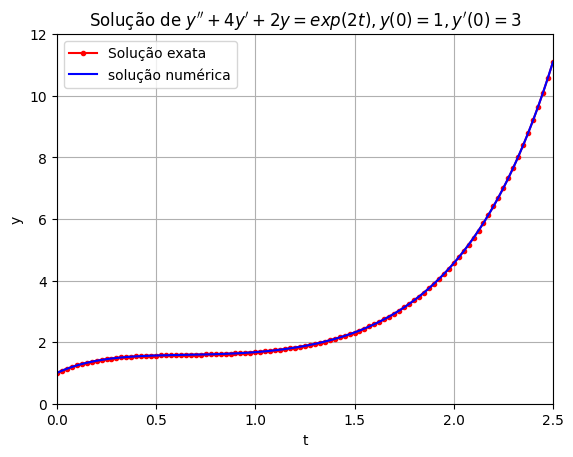

In [ ]:
plt.plot(t,U1em,'r.-')
plt.plot(t,ye(t),'b-')
plt.axis([0,2.5,0,12])
plt.grid(True)
plt.title("Solução de $y''+4y'+2y=exp(2t), y(0)=1, y'(0)=3$");
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["Solução exata", "solução numérica"])

Façamos um gráfico do erro em cada ponto:

Text(0, 0.5, 'erro')

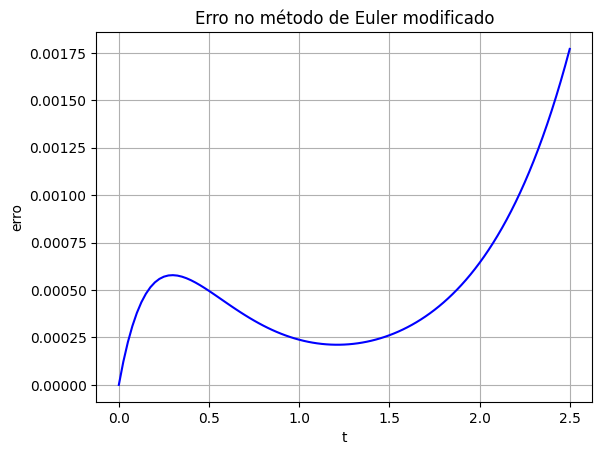

In [ ]:
plt.plot(t,abs(ye(t)-U1em),'b-')
plt.grid(True)
plt.title("Erro no método de Euler modificado");
plt.xlabel('t')
plt.ylabel('erro')

O erro máximo aqui é da ordem de $10^{-3}$. O método de Euler simples aplicado a este problema resultou num erro máximo da ordem de 0.3

## 4. Método dos dois terços para EDOs de segunda ordem

A generalização para do método dos dois terços para EDOs de ordens superiores segue os mesmos passos para caso do método de Euler modificado.  No caso de segunda ordem, para uma EDO do tipo $y'' = f(t,y(t), y'(t))$ definimos  $u_1=y$ e $u_2=y'$, de modo que a EDO pode ser reescrita como

\begin{align}
& u_1'=u_2(t)\\
& u_2'=f\left[t,u_1(t),u_2(t)\right]\,.
\end{align}
Em forma matricial, com
$$
Y(t)=\begin{bmatrix}
u_1(t) \\
u_2(t)
\end{bmatrix}\,\,,F(t,Y(t))=\begin{bmatrix}
u_2(t) \\
f\left[t,u_1(t),u_2(t)\right]\,,
\end{bmatrix}
$$
temos

$$
Y'(t)=F(t,Y(t))\,.
$$
O método dos dois terços, de acordo com (11), é dado pelo seguinte processo iterativo:

$$
Y(t+h):=Y(t)+h \left(\frac{1}{4}w_1+\frac{3}{4}w_2\right)\,,\qquad (15)
$$

$$
w_1=F(t,Y(t))=\begin{bmatrix}
u_2(t) \\
f\left[t,u_1(t),u_2(t)\right]
\end{bmatrix}\,.\qquad (16)
$$

$$
\,,\quad w_2 = F\left(t+\frac{2}{3}h ,Y(t)+\frac{2}{3}w_1 h\right)=\begin{bmatrix}
u_2(t)+\frac{2h}{3}f(t,u_1(t),u_2(t))\\
f\left[t+\frac{2h}{3},u_1(t)+\frac{2h}{3}u_2(t), u_2+\frac{2h}{3}f(t,u_1(t),u_2(t))
\right]
\end{bmatrix}\,.\qquad (17)
$$

Em termos das componentes temos

\begin{align}
u_1(t+h)&=u_1(t)+h \left[\frac{1}{4}u_2(t)+\frac{3}{4}\left(u_2(t)+\frac{2h}{3}f(t,u_1(t),u_2(t))\right)\right] , \\
u_2(t+h)&=u_2(t) +\frac{h}{4}f(t,u_1(t),u_2(t)) + \frac{3h}{4} f\left[t+\frac{2h}{3},u_1(t)+\frac{2h}{3}u_2(t), u_2(t)+\frac{2h}{3}f(t,u_1(t),u_2(t))
\right].
\end{align}
Apliquemos este método a um PVI.



### Exemplo 3.1
Apliquemos o método dos dois terços ao problema do Exemplo 2.1, já resolvido por meio do método de Euler modificado e método de Euler simples. O PVI é dado por

$$
y'' +4y'+2y=\mbox{e}^{2t}\,,\qquad y(0)=1\,, \qquad y'(0)=3\,.
$$

Queremos determinar a solução no intervalo $[0,2.5]$ com subintervalos $h=0.025$.
Esta é uma equação linear não homogênea que pode ser resolvido exatamente usando o método dos coeficientes indeterminados. A solução exata é dada por

$$
y = \mbox{e}^{(-2+\sqrt{2})t} \left(\frac{13}{28}+\frac{33\sqrt{2}}{28}\right)+
\mbox{e}^{-(2+\sqrt{2})t} \left(\frac{13}{28}-\frac{33\sqrt{2}}{28}\right)+\frac{\mbox{e}^{2t}}{14}\,.
$$

Aqui $u_1=y$, $u_2=y'$ e $f(t,u_1(t),u_2(t)) = -4u_2(t)-2u_1(t)+\mbox{e}^{2t}$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
f = lambda x,u1,u2: -4*u2-2*u1+np.exp(2*x)

Precisamos de 101 pontos no intervalo $[0,2.5]$, de modo a termos 100 subintervalos de tamanho $h=0.025$:

In [ ]:
t = np.linspace(0,2.5,101)

Definimos as condições iniciais:

In [ ]:
y0 = 1
y1 = 3

Definimos o a função que implementa o método:

In [ ]:
def odeDoisTercos2(f, t, y0, y1):
    N = len(t)
    u1 = np.empty(N)
    u2 = np.empty(N)
    u1[0] = y0
    u2[0] = y1
    h = t[1] - t[0]

    for n in range(N - 1):
        tn = t[n]
        y_n = u1[n]
        yp_n = u2[n]

        k1 = f(tn, y_n, yp_n)
        v1 = yp_n + (2/3) * h * k1

        y_mid = y_n + (2/3) * h * yp_n
        k2 = f(tn + (2/3) * h, y_mid, v1)

        u1[n + 1] = y_n + (h/4) * yp_n + (3/4) * h * v1
        u2[n + 1] = yp_n + (h/4) * k1 + (3/4) * h * k2

    return u1, u2

Determinemos a solução numérica:

In [ ]:
(U1dt,U2dt) = odeDoisTercos2(f,t,y0,y1)

A solução exata é dada por

In [ ]:
ye = lambda x: np.exp((-2.+2**(1/2))*x)*(13./28.+33.*2**(1/2)/28)+np.exp(-(2.+2**(1/2))*x)*(13./28.-33.*2**(1/2)/28)+np.exp(2*x)/14

Façamos os gráficos de $y(t)$:

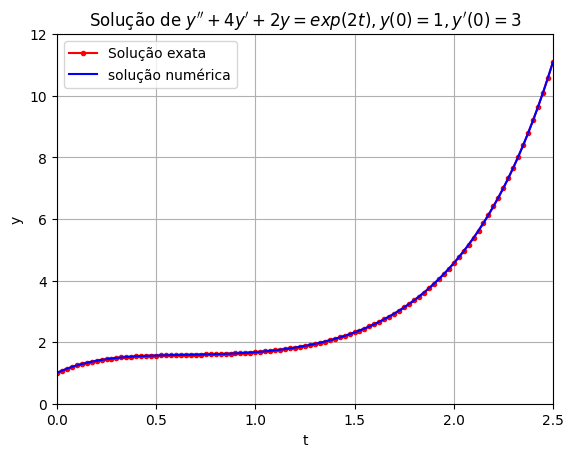

In [ ]:
plt.plot(t,U1dt,'r.-')
plt.plot(t,ye(t),'b-')
plt.axis([0,2.5,0,12])
plt.grid(True)
plt.title("Solução de $y''+4y'+2y=exp(2t), y(0)=1,  y'(0)=3$");
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["Solução exata", "solução numérica"])

Calculemos a acurácia do método dos dois terços aplicado a este problema, comparando com a aquela do método de Euler modificado:

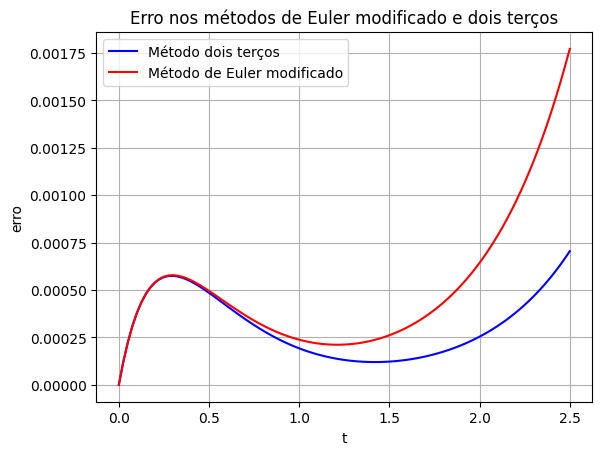

In [ ]:
plt.plot(t,abs(ye(t)-U1dt),'b-')
plt.plot(t,abs(ye(t)-U1em),'r-')
plt.grid(True)
plt.title("Erro nos métodos de Euler modificado e dois terços");
plt.xlabel('t')
plt.ylabel('erro')
plt.legend(["Método dois terços","Método de Euler modificado",])

## Exercícios

**1.** Implemente o método de Heun,

$$
Y(t+h)=Y(t)+\frac{h}{2}\left[F(t,Y(t))+F(t+h,y(t)+hf(t,Y(t)) \right]\,,
$$

para PVIs envolvendo (i) EDOs de primeira e (ii) EDOs de segunda ordem. Em cada caso, teste os procedimentos nos exemplos acima (usando EDOs com soluções exatas), comparando os desempenhos relativamente à acurácia.

**2.** Generalize o método de Euler modificado para o caso de uma EDO de terceira ordem. Apresente exemplos.

**3.** Generalize o método de Heun para um sistema de 2 equações diferenciais de primeira ordem. Apresente exemplos.

**4.** Generalize o método de Euler modificado para um sistema de 4 equações diferenciais de primeira ordem. Apresente exemplos.

**5.** Considere um PVI de segunda ordem linear com coeficientes variáveis. Analise a acuráricia dos métodos de segunda ordem descritos acima. Inclua na sua comparação o correspondente método da série de Taylor.

**6.** Compare a acurácia dos 4 métodos de segunda ordem descritos neste tutorial, quando aplicados a um PVI de segunda ordem com solução exata conhecida (diferente do usado nos exemplos do texto).  

## Referências

1. V. A. Patel, Numerical Analysis, Saunders College Pub., p. 248. 1993.
2. Mark H. Holmes, Introduction to Numerical Methods in Differential Equations, Springer, 2007.